In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Train_Test_IoT_Modbus.csv")

In [3]:
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal


In [4]:
encodingLabels=pd.get_dummies(df.type)
df=pd.concat([df, encodingLabels], axis=1)

In [5]:
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,backdoor,injection,normal,password,scanning,xss
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection,0,1,0,0,0,0
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection,0,1,0,0,0,0
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection,0,1,0,0,0,0
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection,0,1,0,0,0,0
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal,0,0,1,0,0,0
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal,0,0,1,0,0,0
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal,0,0,1,0,0,0
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal,0,0,1,0,0,0


In [6]:
X=df[["FC1_Read_Input_Register","FC2_Read_Discrete_Value","FC3_Read_Holding_Register","FC4_Read_Coil"]]
y=df[['backdoor','injection','normal','password','scanning','xss']]

In [7]:
from sklearn.preprocessing import StandardScaler
 

 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
X=scaler.fit_transform(X)

In [8]:
X

array([[ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       [ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       [ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       ...,
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568],
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568],
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568]])

In [9]:
y

,backdoor,injection,normal,password,scanning,xss
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
51101,0,0,1,0,0,0
51102,0,0,1,0,0,0
51103,0,0,1,0,0,0
51104,0,0,1,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))

Train Data size: 43440
Test Data size 7666


In [11]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(4, 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2),padding="same"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2),padding="same"))
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(4, 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2),padding="same"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2),padding="same"))
cnn.add(Flatten())
#cnn.add(Dropout(0.1))
cnn.add(Dense(6, activation="softmax"))

In [12]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [13]:
checkpointer = callbacks.ModelCheckpoint(filepath="checkpointMODBUS-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('cnntrainanalysisMODBUSnolstm.csv',separator=',', append=False)

In [14]:
import time
start = time.time()

history=cnn.fit(X_train, y_train,batch_size=256,epochs=500,validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
cnn.save("cnn_modelMODBUSnolstm.hdf5")

end = time.time()
diff = (end - start)/60
print('Training time (in Minutes):', diff)

Epoch 1/500
170/170 [==============================] - 4s 19ms/step - loss: 1.1050 - accuracy: 0.6799 - val_loss: 1.0408 - val_accuracy: 0.6902
Epoch 2/500
170/170 [==============================] - 3s 18ms/step - loss: 1.0465 - accuracy: 0.6839 - val_loss: 1.0220 - val_accuracy: 0.6902
Epoch 3/500
170/170 [==============================] - 4s 22ms/step - loss: 1.0441 - accuracy: 0.6839 - val_loss: 1.0268 - val_accuracy: 0.6902
Epoch 4/500
170/170 [==============================] - 4s 25ms/step - loss: 1.0430 - accuracy: 0.6839 - val_loss: 1.0228 - val_accuracy: 0.6902
Epoch 5/500
170/170 [==============================] - 4s 23ms/step - loss: 1.0432 - accuracy: 0.6839 - val_loss: 1.0215 - val_accuracy: 0.6902
Epoch 6/500
170/170 [==============================] - 3s 20ms/step - loss: 1.0421 - accuracy: 0.6839 - val_loss: 1.0210 - val_accuracy: 0.6902
Epoch 7/500
170/170 [==============================] - 3s 17ms/step - loss: 1.0419 - accuracy: 0.6839 - val_loss: 1.0236 - val_accuracy:

170/170 [==============================] - 4s 25ms/step - loss: 0.9909 - accuracy: 0.6854 - val_loss: 0.9846 - val_accuracy: 0.6912
Epoch 28/500
170/170 [==============================] - 4s 23ms/step - loss: 0.9820 - accuracy: 0.6858 - val_loss: 0.9949 - val_accuracy: 0.6920
Epoch 29/500
170/170 [==============================] - 4s 22ms/step - loss: 0.9698 - accuracy: 0.6879 - val_loss: 0.9794 - val_accuracy: 0.6906
Epoch 30/500
170/170 [==============================] - 4s 22ms/step - loss: 0.9552 - accuracy: 0.6898 - val_loss: 0.9718 - val_accuracy: 0.6912
Epoch 31/500
170/170 [==============================] - 4s 21ms/step - loss: 0.9407 - accuracy: 0.6927 - val_loss: 0.9582 - val_accuracy: 0.6940
Epoch 32/500
170/170 [==============================] - 4s 21ms/step - loss: 0.9251 - accuracy: 0.6962 - val_loss: 0.9492 - val_accuracy: 0.6983
Epoch 33/500
170/170 [==============================] - 3s 20ms/step - loss: 0.9091 - accuracy: 0.7001 - val_loss: 0.9420 - val_accuracy: 0.697

170/170 [==============================] - 4s 22ms/step - loss: 0.4851 - accuracy: 0.8362 - val_loss: 0.6049 - val_accuracy: 0.8098
Epoch 54/500
170/170 [==============================] - 4s 22ms/step - loss: 0.4648 - accuracy: 0.8432 - val_loss: 0.6042 - val_accuracy: 0.8102
Epoch 55/500
170/170 [==============================] - 4s 23ms/step - loss: 0.4608 - accuracy: 0.8451 - val_loss: 0.6099 - val_accuracy: 0.8060
Epoch 56/500
170/170 [==============================] - 4s 22ms/step - loss: 0.4470 - accuracy: 0.8477 - val_loss: 0.6031 - val_accuracy: 0.8092
Epoch 57/500
170/170 [==============================] - 4s 22ms/step - loss: 0.4353 - accuracy: 0.8532 - val_loss: 0.5822 - val_accuracy: 0.8193
Epoch 58/500
170/170 [==============================] - 4s 25ms/step - loss: 0.4071 - accuracy: 0.8632 - val_loss: 0.5663 - val_accuracy: 0.8218
Epoch 59/500
170/170 [==============================] - 4s 23ms/step - loss: 0.4084 - accuracy: 0.8642 - val_loss: 0.5980 - val_accuracy: 0.819

Epoch 80/500
170/170 [==============================] - 4s 25ms/step - loss: 0.2124 - accuracy: 0.9343 - val_loss: 0.3723 - val_accuracy: 0.8986
Epoch 81/500
170/170 [==============================] - 4s 22ms/step - loss: 0.2147 - accuracy: 0.9340 - val_loss: 0.3910 - val_accuracy: 0.8932
Epoch 82/500
170/170 [==============================] - 4s 25ms/step - loss: 0.2186 - accuracy: 0.9331 - val_loss: 0.3649 - val_accuracy: 0.9028
Epoch 83/500
170/170 [==============================] - 4s 21ms/step - loss: 0.2105 - accuracy: 0.9377 - val_loss: 0.3768 - val_accuracy: 0.9019
Epoch 84/500
170/170 [==============================] - 4s 22ms/step - loss: 0.2020 - accuracy: 0.9382 - val_loss: 0.3753 - val_accuracy: 0.9015
Epoch 85/500
170/170 [==============================] - 4s 23ms/step - loss: 0.2001 - accuracy: 0.9390 - val_loss: 0.3647 - val_accuracy: 0.9026
Epoch 86/500
170/170 [==============================] - 4s 21ms/step - loss: 0.1878 - accuracy: 0.9438 - val_loss: 0.3463 - val_ac

Epoch 107/500
170/170 [==============================] - 3s 20ms/step - loss: 0.1453 - accuracy: 0.9563 - val_loss: 0.2728 - val_accuracy: 0.9343
Epoch 108/500
170/170 [==============================] - 4s 22ms/step - loss: 0.1480 - accuracy: 0.9546 - val_loss: 0.3145 - val_accuracy: 0.9173
Epoch 109/500
170/170 [==============================] - 3s 18ms/step - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.2830 - val_accuracy: 0.9258
Epoch 110/500
170/170 [==============================] - 3s 19ms/step - loss: 0.1281 - accuracy: 0.9612 - val_loss: 0.2891 - val_accuracy: 0.9270
Epoch 111/500
170/170 [==============================] - 3s 20ms/step - loss: 0.1347 - accuracy: 0.9595 - val_loss: 0.2943 - val_accuracy: 0.9229
Epoch 112/500
170/170 [==============================] - 3s 20ms/step - loss: 0.1284 - accuracy: 0.9597 - val_loss: 0.2859 - val_accuracy: 0.9293
Epoch 113/500
170/170 [==============================] - 5s 28ms/step - loss: 0.1369 - accuracy: 0.9578 - val_loss: 0.2963 -

170/170 [==============================] - 3s 18ms/step - loss: 0.1247 - accuracy: 0.9607 - val_loss: 0.2600 - val_accuracy: 0.9354
Epoch 134/500
170/170 [==============================] - 4s 23ms/step - loss: 0.1023 - accuracy: 0.9679 - val_loss: 0.2507 - val_accuracy: 0.9433
Epoch 135/500
170/170 [==============================] - 4s 22ms/step - loss: 0.1174 - accuracy: 0.9635 - val_loss: 0.2725 - val_accuracy: 0.9375
Epoch 136/500
170/170 [==============================] - 3s 18ms/step - loss: 0.1026 - accuracy: 0.9671 - val_loss: 0.2571 - val_accuracy: 0.9399
Epoch 137/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0958 - accuracy: 0.9696 - val_loss: 0.2574 - val_accuracy: 0.9425
Epoch 138/500
170/170 [==============================] - 3s 18ms/step - loss: 0.1195 - accuracy: 0.9622 - val_loss: 0.3003 - val_accuracy: 0.9259
Epoch 139/500
170/170 [==============================] - 3s 19ms/step - loss: 0.1034 - accuracy: 0.9674 - val_loss: 0.2294 - val_accuracy:

Epoch 160/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0723 - accuracy: 0.9778 - val_loss: 0.2310 - val_accuracy: 0.9547
Epoch 161/500
170/170 [==============================] - 3s 18ms/step - loss: 0.1019 - accuracy: 0.9674 - val_loss: 0.2415 - val_accuracy: 0.9490
Epoch 162/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0893 - accuracy: 0.9720 - val_loss: 0.2441 - val_accuracy: 0.9542
Epoch 163/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0896 - accuracy: 0.9723 - val_loss: 0.2622 - val_accuracy: 0.9443
Epoch 164/500
170/170 [==============================] - 4s 21ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.2828 - val_accuracy: 0.9406
Epoch 165/500
170/170 [==============================] - 3s 21ms/step - loss: 0.0939 - accuracy: 0.9709 - val_loss: 0.2380 - val_accuracy: 0.9493
Epoch 166/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0833 - accuracy: 0.9737 - val_loss: 0.2413 -

170/170 [==============================] - 3s 19ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.2335 - val_accuracy: 0.9601
Epoch 187/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0766 - accuracy: 0.9760 - val_loss: 0.2377 - val_accuracy: 0.9555
Epoch 188/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 0.2227 - val_accuracy: 0.9598
Epoch 189/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.2566 - val_accuracy: 0.9493
Epoch 190/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.2107 - val_accuracy: 0.9626
Epoch 191/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.2309 - val_accuracy: 0.9601
Epoch 192/500
170/170 [==============================] - 3s 21ms/step - loss: 0.0683 - accuracy: 0.9788 - val_loss: 0.2365 - val_accuracy:

Epoch 213/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.2362 - val_accuracy: 0.9623
Epoch 214/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.2412 - val_accuracy: 0.9570
Epoch 215/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0576 - accuracy: 0.9810 - val_loss: 0.2292 - val_accuracy: 0.9626
Epoch 216/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.2337 - val_accuracy: 0.9646
Epoch 217/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.2506 - val_accuracy: 0.9580
Epoch 218/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0745 - accuracy: 0.9771 - val_loss: 0.2147 - val_accuracy: 0.9645
Epoch 219/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.2259 -

170/170 [==============================] - 4s 24ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.2454 - val_accuracy: 0.9624
Epoch 240/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.2338 - val_accuracy: 0.9663
Epoch 241/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.2330 - val_accuracy: 0.9645
Epoch 242/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.2730 - val_accuracy: 0.9594
Epoch 243/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0665 - accuracy: 0.9798 - val_loss: 0.2331 - val_accuracy: 0.9644
Epoch 244/500
170/170 [==============================] - 4s 22ms/step - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.2481 - val_accuracy: 0.9602
Epoch 245/500
170/170 [==============================] - 5s 30ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.2537 - val_accuracy:

170/170 [==============================] - 4s 23ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.2438 - val_accuracy: 0.9646
Epoch 267/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.2333 - val_accuracy: 0.9676
Epoch 268/500
170/170 [==============================] - 4s 25ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.2475 - val_accuracy: 0.9656
Epoch 269/500
170/170 [==============================] - 4s 24ms/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.2321 - val_accuracy: 0.9667
Epoch 270/500
170/170 [==============================] - 4s 24ms/step - loss: 0.0586 - accuracy: 0.9806 - val_loss: 0.2405 - val_accuracy: 0.9654
Epoch 271/500
170/170 [==============================] - 4s 21ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.2282 - val_accuracy: 0.9706
Epoch 272/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.2300 - val_accuracy:

170/170 [==============================] - 3s 20ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.2369 - val_accuracy: 0.9721
Epoch 293/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.2116 - val_accuracy: 0.9743
Epoch 294/500
170/170 [==============================] - 5s 28ms/step - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.2727 - val_accuracy: 0.9562
Epoch 295/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0507 - accuracy: 0.9833 - val_loss: 0.2274 - val_accuracy: 0.9722
Epoch 296/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.2270 - val_accuracy: 0.9691
Epoch 297/500
170/170 [==============================] - 5s 28ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.2423 - val_accuracy: 0.9706
Epoch 298/500
170/170 [==============================] - 4s 25ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.2486 - val_accuracy:

Epoch 319/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.2208 - val_accuracy: 0.9752
Epoch 320/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.2589 - val_accuracy: 0.9646
Epoch 321/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0515 - accuracy: 0.9851 - val_loss: 0.2279 - val_accuracy: 0.9743
Epoch 322/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.2430 - val_accuracy: 0.9660
Epoch 323/500
170/170 [==============================] - 4s 22ms/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.2157 - val_accuracy: 0.9729
Epoch 324/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.2298 - val_accuracy: 0.9704
Epoch 325/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.2249 -

170/170 [==============================] - 4s 22ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.2189 - val_accuracy: 0.9705
Epoch 346/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.2391 - val_accuracy: 0.9748
Epoch 347/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.2606 - val_accuracy: 0.9640
Epoch 348/500
170/170 [==============================] - 4s 22ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.2360 - val_accuracy: 0.9727
Epoch 349/500
170/170 [==============================] - 4s 24ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.2550 - val_accuracy: 0.9646
Epoch 350/500
170/170 [==============================] - 5s 29ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.2261 - val_accuracy: 0.9717
Epoch 351/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.2352 - val_accuracy:

170/170 [==============================] - 3s 18ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.2451 - val_accuracy: 0.9701
Epoch 372/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.2307 - val_accuracy: 0.9736
Epoch 373/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.2340 - val_accuracy: 0.9654
Epoch 374/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.2420 - val_accuracy: 0.9723
Epoch 375/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.2589 - val_accuracy: 0.9674
Epoch 376/500
170/170 [==============================] - 4s 22ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.2295 - val_accuracy: 0.9730
Epoch 377/500
170/170 [==============================] - 4s 24ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.2357 - val_accuracy:

Epoch 398/500
170/170 [==============================] - 4s 22ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.2670 - val_accuracy: 0.9626
Epoch 399/500
170/170 [==============================] - 4s 24ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.2069 - val_accuracy: 0.9772
Epoch 400/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.2211 - val_accuracy: 0.9786
Epoch 401/500
170/170 [==============================] - 4s 23ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.2342 - val_accuracy: 0.9730
Epoch 402/500
170/170 [==============================] - 6s 37ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.2247 - val_accuracy: 0.9757
Epoch 403/500
170/170 [==============================] - 5s 27ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.2442 - val_accuracy: 0.9725
Epoch 404/500
170/170 [==============================] - 5s 28ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.2410 -

170/170 [==============================] - 4s 23ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.2176 - val_accuracy: 0.9755
Epoch 425/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.2245 - val_accuracy: 0.9743
Epoch 426/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.2343 - val_accuracy: 0.9721
Epoch 427/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0301 - accuracy: 0.9916 - val_loss: 0.2414 - val_accuracy: 0.9680
Epoch 428/500
170/170 [==============================] - 4s 21ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.2436 - val_accuracy: 0.9657
Epoch 429/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.2158 - val_accuracy: 0.9778
Epoch 430/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0329 - accuracy: 0.9903 - val_loss: 0.2216 - val_accuracy:

Epoch 451/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0317 - accuracy: 0.9911 - val_loss: 0.2352 - val_accuracy: 0.9676
Epoch 452/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.2469 - val_accuracy: 0.9727
Epoch 453/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.2224 - val_accuracy: 0.9753
Epoch 454/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.2353 - val_accuracy: 0.9760
Epoch 455/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.2177 - val_accuracy: 0.9760
Epoch 456/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.2224 - val_accuracy: 0.9798
Epoch 457/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.2262 -

Epoch 478/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.2229 - val_accuracy: 0.9769
Epoch 479/500
170/170 [==============================] - 3s 18ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.2384 - val_accuracy: 0.9663
Epoch 480/500
170/170 [==============================] - 3s 20ms/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.2238 - val_accuracy: 0.9747
Epoch 481/500
170/170 [==============================] - 4s 21ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.2230 - val_accuracy: 0.9706
Epoch 482/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0260 - accuracy: 0.9927 - val_loss: 0.2152 - val_accuracy: 0.9763
Epoch 483/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0279 - accuracy: 0.9920 - val_loss: 0.2049 - val_accuracy: 0.9804
Epoch 484/500
170/170 [==============================] - 3s 19ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.2234 -

In [15]:
dfanalysis=pd.read_csv("cnntrainanalysisMODBUSnolstm.csv")
dfanalysis.describe()

,epoch,accuracy,loss,val_accuracy,val_loss
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.947896,0.165954,0.928851,0.328908
std,144.481833,0.083958,0.266431,0.080865,0.218201
min,0.000000,0.679926,0.020161,0.689799,0.201061
25%,124.750000,0.962552,0.039901,0.935266,0.228007
50%,249.500000,0.982424,0.056244,0.964388,0.241020
75%,374.250000,0.987851,0.120272,0.971595,0.276082
max,499.000000,0.994291,1.104969,0.981216,1.040841


In [16]:
from keras.models import load_model
model = load_model('cnn_modelMODBUSnolstm.hdf5')

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

240/240 [==============================] - 1s 3ms/step - loss: 0.2189 - accuracy: 0.9773

Loss: 0.22, Accuracy: 97.73%


In [18]:
y_pred=model.predict(X_test) 
#y_pred=np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)
#y_pred=model.predict(X_test) 
#y_pred=np.argmax(y_pred,axis=1)
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average=None)
precision = precision_score(y_test, y_pred , average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [19]:
recallList=recall.tolist()
precisionList=precision.tolist()
f1lList=f1.tolist()

In [20]:
name_class=['backdoor','injection','normal','password','scanning','xss']
name_class.sort()
name_class

['backdoor', 'injection', 'normal', 'password', 'scanning', 'xss']

In [21]:
recallDict={i:j for i,j in zip(name_class,recallList)}
precisionDict={i:j for i,j in zip(name_class,precisionList)}
f1Dict={i:j for i,j in zip(name_class,f1lList)}

## Average Recall

In [22]:
recallDict

{'backdoor': 0.9504685408299867,
 'injection': 0.9772117962466488,
 'normal': 0.9935739935739936,
 'password': 0.925575101488498,
 'scanning': 0.6623376623376623,
 'xss': 0.9242424242424242}

## Average Precision

In [23]:
precisionDict

{'backdoor': 0.9466666666666667,
 'injection': 0.9745989304812834,
 'normal': 0.9839041736851956,
 'password': 0.9799426934097422,
 'scanning': 0.8793103448275862,
 'xss': 0.9104477611940298}

## Average F1 score

In [24]:
f1Dict

{'backdoor': 0.948563794255177,
 'injection': 0.9759036144578314,
 'normal': 0.9887154410381793,
 'password': 0.9519832985386221,
 'scanning': 0.7555555555555555,
 'xss': 0.9172932330827067}

In [25]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

240/240 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9773
Test accuracy 0.9773023724555969
Test loss 0.21893516182899475


In [26]:
train_loss, train_acc = cnn.evaluate(X_train, y_train)

print("Train accuracy", train_acc)
print("Train loss", train_loss)

1358/1358 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.9945
Train accuracy 0.9944521188735962
Train loss 0.019758932292461395


NameError: name 'confusion_matrix' is not defined

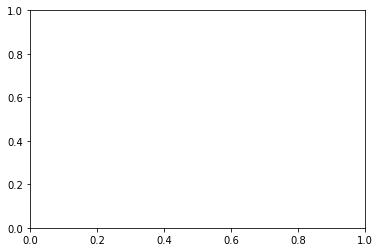

In [27]:
T5_lables = [i for i in range (6)]    
import seaborn as sns

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))


#plt.figure(figsize=(15,15))
#sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm, annot=True,cmap='Blues')



# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
y_test[y_test["normal"]==1]